--------------

### <font color = 'green'> **Problem-Statement**



<p>Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.</p>
<p>We have a data of 74111 Airbnb properties across the nations. Based on this data build multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.</p>


#### <font color = 'green'> **Attribute Information.**

- **id** - Property ID
- **room_type** - Type of Room in the property.
- **accommodates** - How many adults can this property accomodates.
- **bathrooms** - Number of bathrooms in the property.
- **cancellation_policy** - Cancellation policy of the property.
- **cleaning_fee** - This denotes whether propoerty cleaning fee is included in the rent or not.
- **instant_bookable** - It indicates whether instant booking facility is available or not.
- **review_scores_rating** - Review rating score of the property.
- **bedrooms** - Number of bedrooms in the property.
- **beds** - Total number of beds in the property.
- **log_price** - Log of rental price of the property for a fixed period.


### <font color = 'green'> **Import necessary libraries and read the dataset.**

In [ ]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt   

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv("AirBNB.csv")
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932



### <font color = 'green'> **Exploratory Data Analysis**


<font size=3> Perform Necessary Exploratory Data Analysis.

In [ ]:
# lets check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [ ]:
# lets drop the id column as it is useless for the model
df = df.drop('id', axis = 1)

In [ ]:
# lets check basic information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [ ]:
# lets check statistical summary of the data.
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [ ]:
# lets check unique values for categorical variables.
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


CANCELLATION_POLICY :  3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


CLEANING_FEE :  2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


INSTANT_BOOKABLE :  2
t    19451
f    54660
Name: instant_bookable, dtype: int64




### <font color = 'green'> **Data Preparation for model buidling.**

<font size=3> Q. Encode Categorical Variables.

In [ ]:
# Lets convert categorical to dummy variables
df = pd.get_dummies(df, drop_first = True)

In [ ]:
df.head(2)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1


<font size=3> Q. Check for missing values and handle them with appropriate methods.

In [ ]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
instant_bookable_t                  0
dtype: int64

In [ ]:
# Lets impute missing values
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
       
df.isnull().sum()        

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_t              0
dtype: int64

<font size=3> Q. Check for duplicate records and drop them.

In [ ]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 19998


In [ ]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


<font size=3> Q. Check for the presence of outliers and handle them with appropriate techniques.

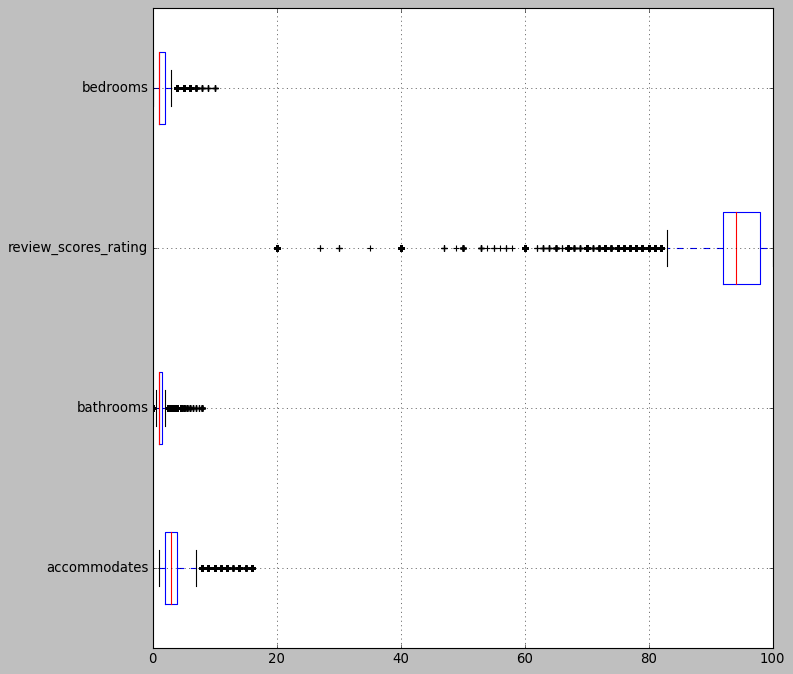

In [ ]:
# lets construct box plot for continuous variables to visualize the presence of outliers
plt.figure(figsize = (10,10))
df.iloc[:, 0:4].boxplot(vert = 0)
plt.show()

In [ ]:
# lets define a function to remove the outliers using IQR approach.
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df.iloc[:, 0:4].columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

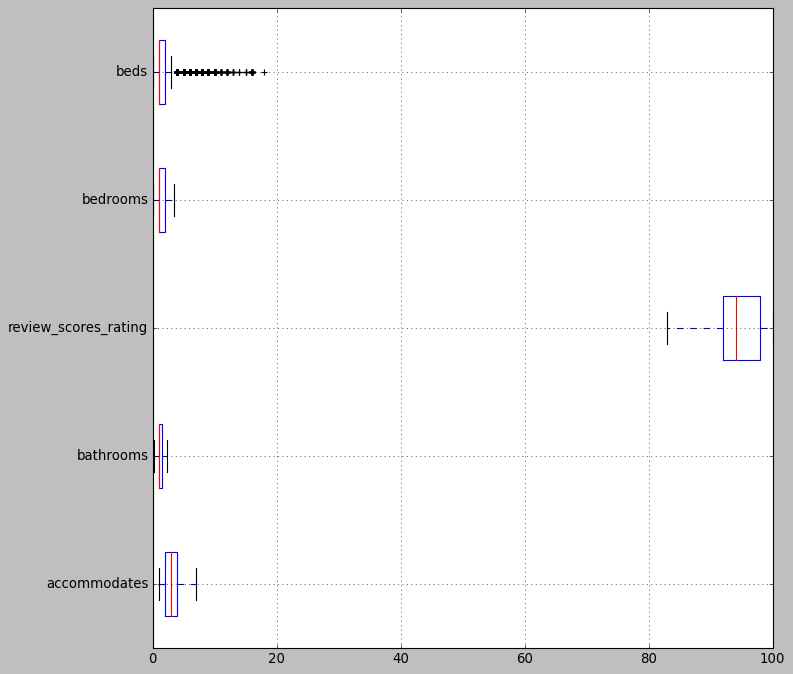

In [ ]:
# Lets visualize again after handling the outliers
plt.figure(figsize=(10,10))
df.iloc[:, 0:5].boxplot(vert=0);

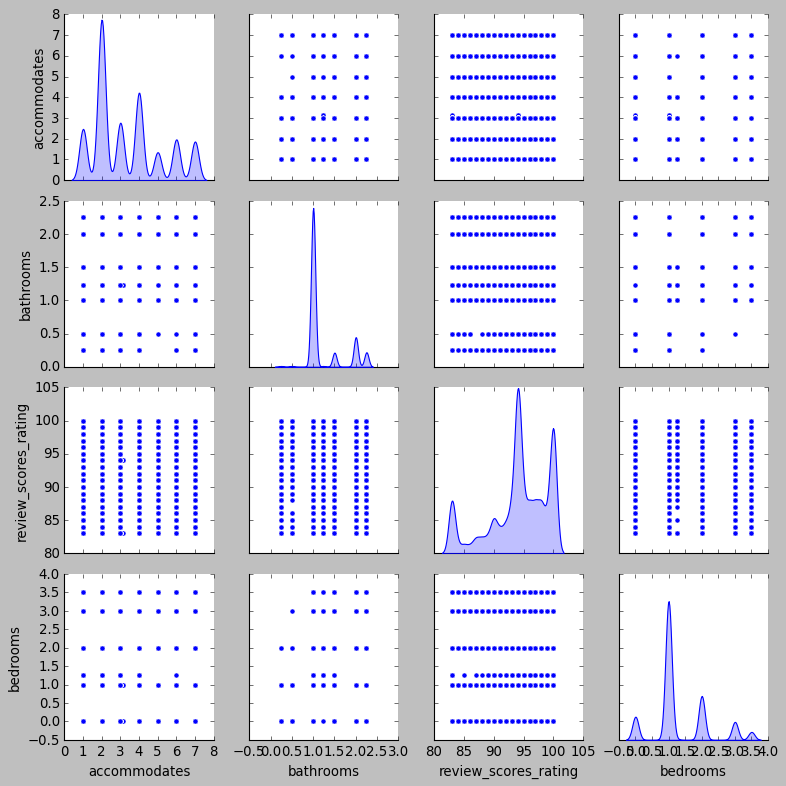

In [ ]:
# Lets look at the data distribution 
df_attr = (df.iloc[:, 0:4])
sns.pairplot(df_attr, diag_kind='kde')   
plt.show()

<font size=3> Q. Split the dataset into two parts (i.e. 70% train and 30% test).

In [ ]:
X = df.drop('log_price', axis = 1) # Copy all the predictor variables into X dataframe
y = df[['log_price']] # Copy target into the y dataframe.

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

<font size=3> Q. Scale the data using appropriate approach.

In [ ]:
## Scaling the data
ss = StandardScaler()
X_train.iloc[:,:5] = ss.fit_transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = ss.transform(X_test.iloc[:,:5])

In [ ]:
X_train.head(2)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
57216,-0.752474,-0.554600,0.001877,-0.393480,-0.662632,0,0,0,1,1,0
37308,-1.310163,1.702682,0.001877,1.991033,-0.662632,1,0,0,0,0,0


In [ ]:
X_test.head(2)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
22473,0.362902,-0.5546,0.598047,-0.39348,0.776775,0,0,0,0,1,1
9903,-0.752474,-0.5546,-2.247983,-0.39348,-0.662632,1,0,0,0,1,0


### <font color = 'green'> **Model buidling - Linear Regression Model**

<font size=3> Q. Buid a linear regression model and evaluate the model performance.

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.15266220697257046
The coefficient for bathrooms is 0.08554154943793768
The coefficient for review_scores_rating is 0.05802042466453222
The coefficient for bedrooms is 0.12858526200269627
The coefficient for beds is -0.007828525287970001
The coefficient for room_type_Private room is -0.6119995111009453
The coefficient for room_type_Shared room is -1.1016992221410955
The coefficient for cancellation_policy_moderate is -0.06403555390999933
The coefficient for cancellation_policy_strict is -0.010826054889524967
The coefficient for cleaning_fee_True is -0.08718890076421229
The coefficient for instant_bookable_t is -0.06894223329713292


In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.219066587892818


In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

0.49801263444066945

- **49% of the variation in the log_price is explained by the predictors in the model.**


In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)

0.49596350757790086


### <font color = 'green'> **Linear Regression using statsmodels**

In [ ]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis = 1)
data_train.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t,log_price
57216,-0.752474,-0.554600,0.001877,-0.393480,-0.662632,0,0,0,1,1,0,4.804021
37308,-1.310163,1.702682,0.001877,1.991033,-0.662632,1,0,0,0,0,0,3.688879
6798,-1.310163,1.702682,1.004622,-0.393480,-0.662632,1,0,0,1,0,1,3.806662
50997,-0.752474,-0.554600,-0.418393,-1.585736,-0.662632,0,0,0,1,1,1,5.010635
2105,2.035967,-0.554600,1.207910,-1.585736,-0.662632,0,0,0,1,1,0,6.396930


In [ ]:
# Renaming columns for simplicity
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [ ]:
data_train.columns

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'room_type_private_room', 'room_type_shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_t', 'log_price'],
      dtype='object')

In [ ]:
expr =  'log_price ~ accommodates + bathrooms + review_scores_rating + bedrooms + beds + room_type_private_room + room_type_shared_room + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True +instant_bookable_t'

In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = expr, data = data_train).fit()
lm1.params

Intercept                       5.219067
accommodates                    0.152662
bathrooms                       0.085542
review_scores_rating            0.058020
bedrooms                        0.128585
beds                           -0.007829
room_type_private_room         -0.612000
room_type_shared_room          -1.101699
cancellation_policy_moderate   -0.064036
cancellation_policy_strict     -0.010826
cleaning_fee_True              -0.087189
instant_bookable_t             -0.068942
dtype: float64

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     3415.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:22:12   Log-Likelihood:                -30077.
No. Observations:               37879   AIC:                         6.018e+04
Df Residuals:                   37867   BIC:                         6.028e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
# Prediction on Training data
y_train_pred = lm1.predict()

In [ ]:
# Calculate the RMSE on the Training Data
metrics.mean_squared_error(y_train,y_train_pred)

0.28655537416318994

In [ ]:
np.sqrt(0.28655537416318994)

0.5353086718550242

In [ ]:
# Prediction on Test data
y_test_pred = regression_model.predict(X_test)

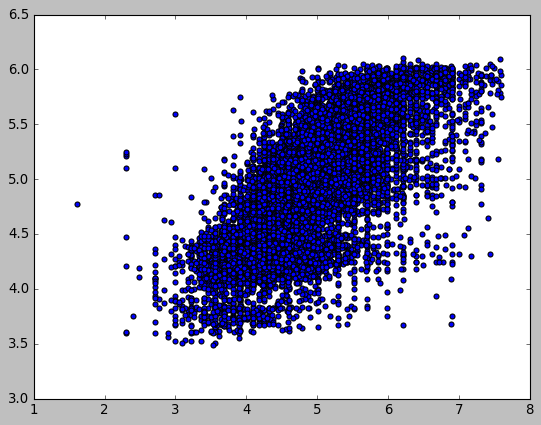

In [ ]:
plt.scatter(y_test['log_price'], y_test_pred)
plt.show()

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

0.5369125849827524